In [191]:
!pip install shap

In [193]:
# rf_shap.py
import shap
print("✅ SHAP is successfully installed!")

✅ SHAP is successfully installed!


In [199]:
print(shap_values.shape)  # should return (#samples, #features, #classes)


(92, 27)


In [211]:
print(shap_values.shape)


(92, 27, 2)


In [215]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values is a 3D NumPy array with shape (n_samples, n_features, 2)
# Use only class 1 (e.g., "Pos") if binary classification
shap_values_rf = shap.Explanation(
    values=shap_values[:, :, 1],  # class 1 SHAP values
    base_values=explainer.expected_value[1],  # base value for class 1
    data=test_x,
    feature_names=test_x.columns
)

# Save plot
plt.figure()
shap.plots.beeswarm(shap_values_rf, max_display=20, show=False)
plt.title("SHAP Summary - Random Forest", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("shap_rf_summary.png", dpi=300)
plt.close()


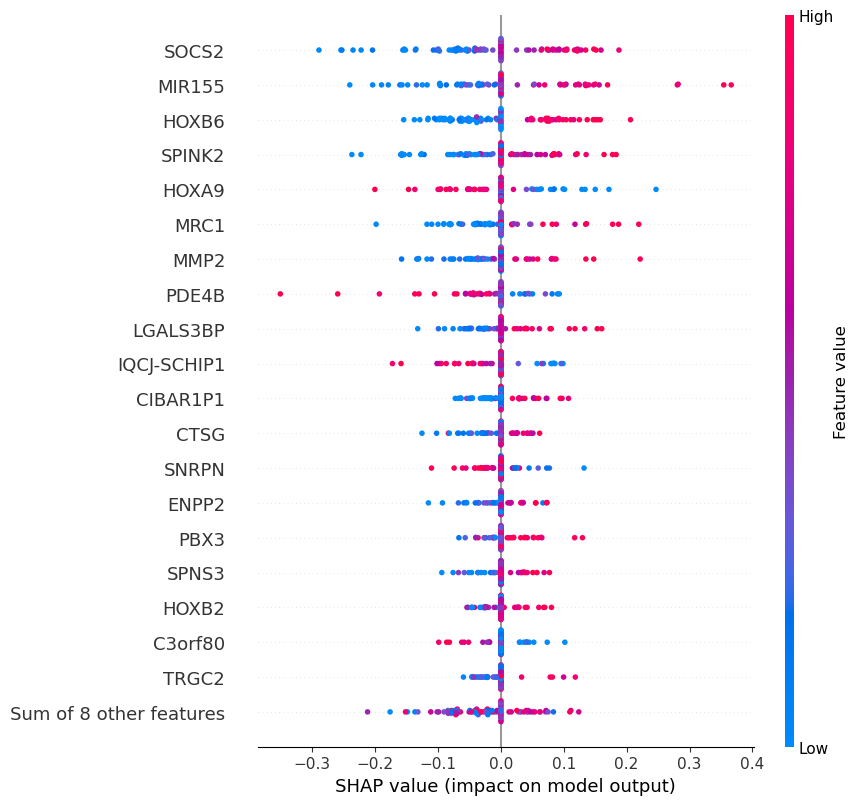

In [125]:

# ✅ Plot it
shap.plots.beeswarm(shap_values_nn_pos, max_display=20)

In [221]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load data
train_x = pd.read_csv("train_x_rf.csv")
train_y = pd.read_csv("train_y_rf.csv").values.ravel()
test_x = pd.read_csv("test_x_rf.csv")

# Encode target labels
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_y)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(train_x, train_y_encoded)

# Use TreeExplainer (works better for tree models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer(test_x)  # ✅ This already returns a SHAP Explanation object


# Use SHAP values for class 1 (typically corresponds to "Pos")
shap_values_class1 = shap_values[:, :, 1]

In [227]:
# Create and save SHAP beeswarm plot
plt.figure()
shap.plots.beeswarm(shap_values_class1, max_display=20, show=False)
plt.title("SHAP Summary - Random Forest (Class: Pos)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("shap_rf_summary.png", dpi=300)
plt.close()

In [141]:
print("SHAP values shape:", shap_values.shape)

SHAP values shape: (92, 27, 2)


In [229]:
!pip install xgboost


In [145]:
import os
print(os.getcwd())


C:\Users\PC\Downloads


In [231]:
train_x = pd.read_csv("C:/Users/PC/Downloads/train_x_xgb.csv")
test_x = pd.read_csv("C:/Users/PC/Downloads/test_x_xgb.csv")
train_y = pd.read_csv("C:/Users/PC/Downloads/train_y_rf.csv").values.ravel()


In [233]:
# Encode target labels: "Neg" -> 0, "Pos" -> 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_y)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss')

xgb_model.fit(train_x, train_y_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

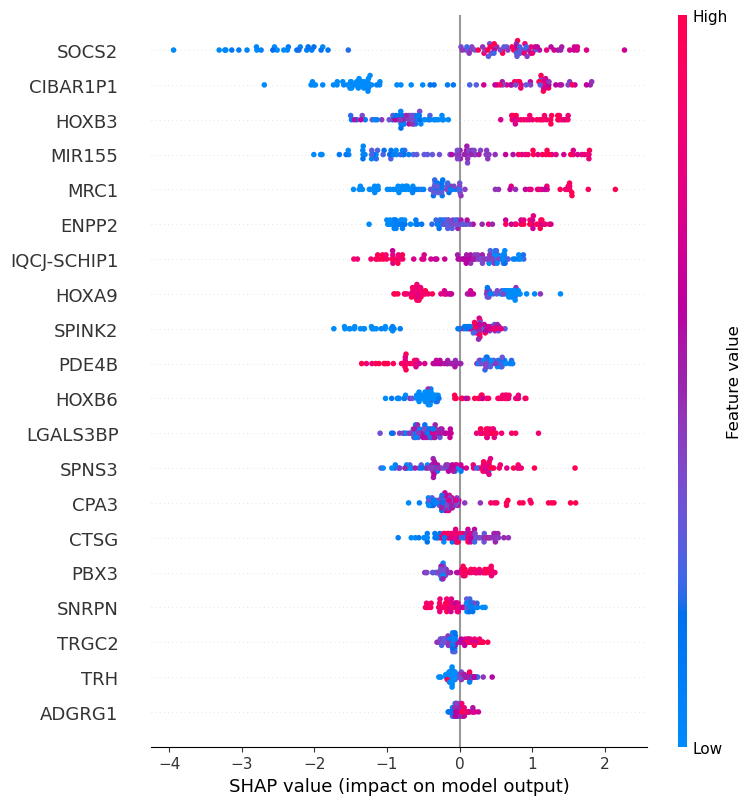

In [235]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, train_x)

# Compute SHAP values on test data
shap_values = explainer(test_x)

# SHAP summary plot (top 20 features)
shap.plots.beeswarm(shap_values, max_display=20)


In [239]:
# Save SHAP summary plot
plt.figure()
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.title("SHAP Summary - XGBoost", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("shap_xgb_summary.png", dpi=300)
plt.close()


In [243]:
import pandas as pd
import shap
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [245]:
train_x = pd.read_csv('train_x_svm.csv')
test_x = pd.read_csv('test_x_svm.csv')
train_y = pd.read_csv('train_y_rf.csv').values.ravel()

# Encode target labels
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_y)


In [247]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(train_x, train_y_encoded)


SVC(probability=True, random_state=42)

In [249]:
# Use a small background set for SHAP
background = shap.sample(train_x, 100)  # or fewer if large

# KernelExplainer (for non-tree models like SVM)
explainer = shap.KernelExplainer(svm_model.predict_proba, background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(test_x, nsamples=100)


  0%|          | 0/92 [00:00<?, ?it/s]

In [251]:
print("SHAP shape:", shap_values[1].shape)
print("test_x shape:", test_x.shape)


SHAP shape: (27, 2)
test_x shape: (92, 27)


In [253]:
explainer = shap.Explainer(svm_model.predict, test_x)  # Or train_x if needed
shap_values = explainer(test_x)


PermutationExplainer explainer: 93it [02:21,  1.61s/it]                        


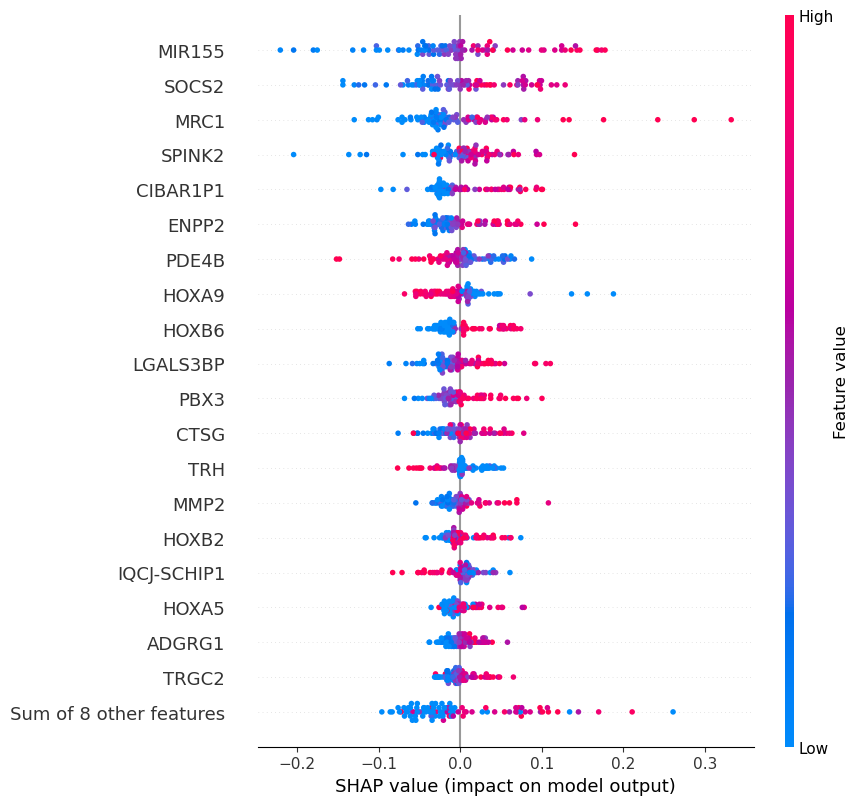

In [257]:
shap.plots.beeswarm(shap_values, max_display=20)

In [261]:
import matplotlib.pyplot as plt

# Save SHAP summary plot for SVM
plt.figure()
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.title("SHAP Summary - SVM", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("shap_svm_summary.png", dpi=300)
plt.close()


In [267]:
train_x = pd.read_csv("train_x_lasso.csv")
train_y = pd.read_csv("train_y_lasso.csv").values.ravel()
test_x  = pd.read_csv("test_x_lasso.csv")


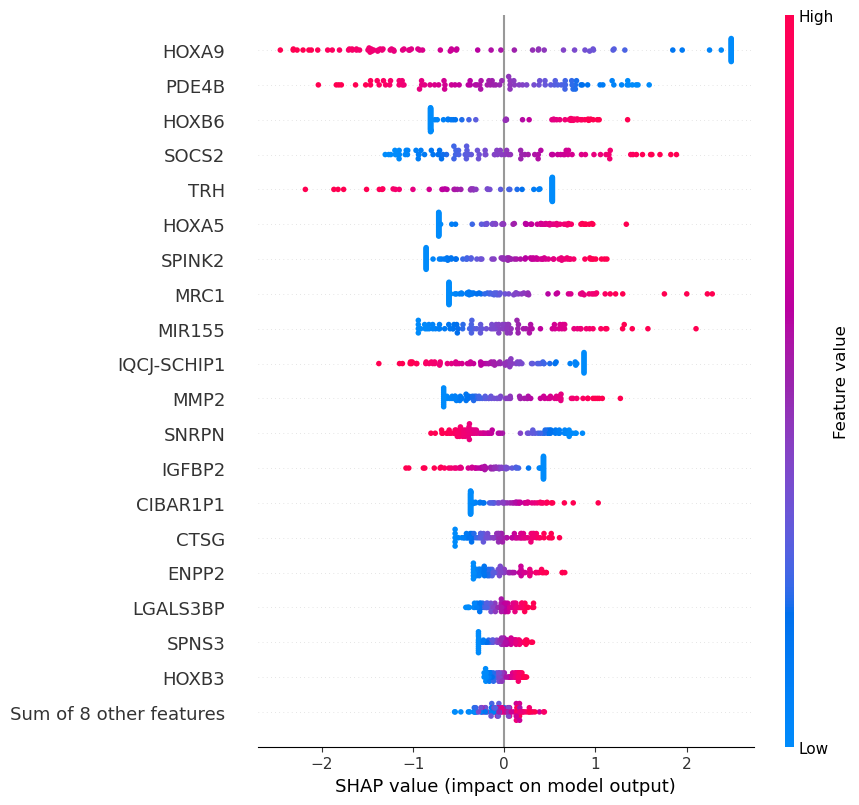

In [269]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load data
train_x = pd.read_csv('train_x_lasso.csv')
train_y = pd.read_csv('train_y_lasso.csv').values.ravel()
test_x = pd.read_csv('test_x_lasso.csv')

# Encode labels if they are "Neg"/"Pos"
le = LabelEncoder()
train_y_encoded = le.fit_transform(train_y)

# Train LASSO model (L1 penalty)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(train_x, train_y_encoded)

# SHAP Explainer
explainer = shap.Explainer(lasso_model, train_x)
shap_values = explainer(test_x)

# SHAP Beeswarm Plot (Top 20)
shap.plots.beeswarm(shap_values, max_display=20)


In [273]:
import matplotlib.pyplot as plt

# Save SHAP summary plot for LASSO
plt.figure()
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.title("SHAP Summary - LASSO", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("shap_lasso_summary.png", dpi=300)
plt.close()


In [283]:
train_x = pd.read_csv("train_x_nn.csv")
test_x = pd.read_csv("test_x_nn.csv")
train_y = pd.read_csv("train_y_nn.csv").values.ravel()


In [285]:
print(f"SHAP values shape: {np.array(shap_values).shape}")
print(f"test_x shape: {test_x.shape}")


SHAP values shape: (92, 27)
test_x shape: (92, 27)


SHAP shape: (92, 27)
test_x shape: (92, 27)


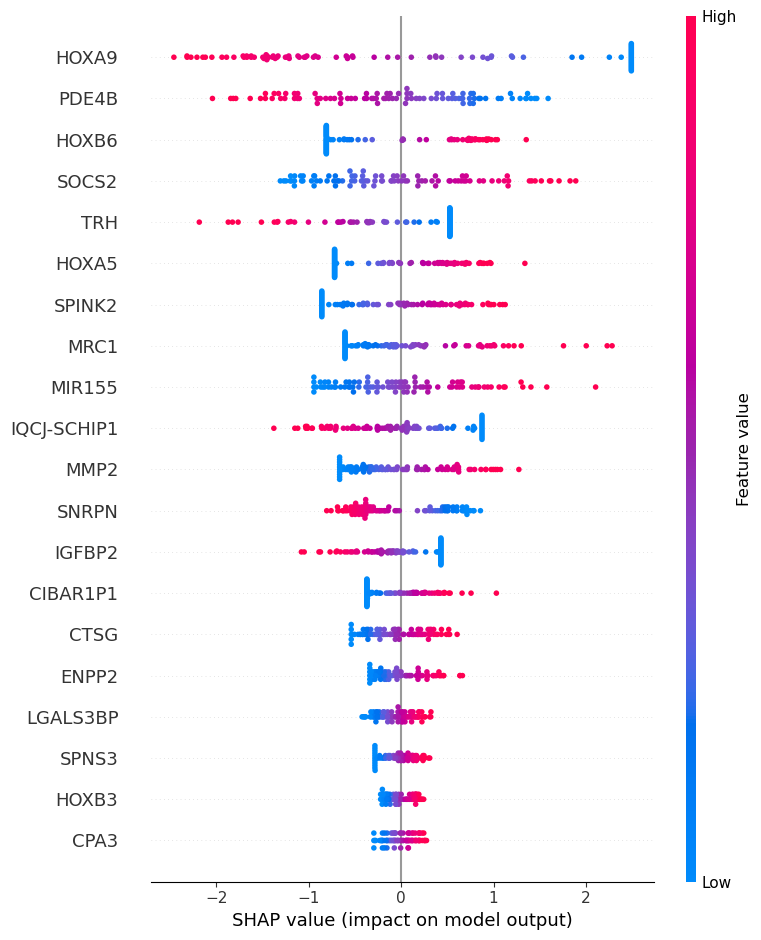

In [295]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Fix randomness for reproducibility
rng = np.random.default_rng(42)

# Confirm shape again
print(f"SHAP shape: {np.array(shap_values).shape}")  # Should be (92, 27)
print(f"test_x shape: {test_x.shape}")                # Should be (92, 27)

# SHAP summary plot (no slicing!)
shap.summary_plot(shap_values, test_x, max_display=20, plot_type='dot', show=True, rng=rng)


In [303]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [305]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


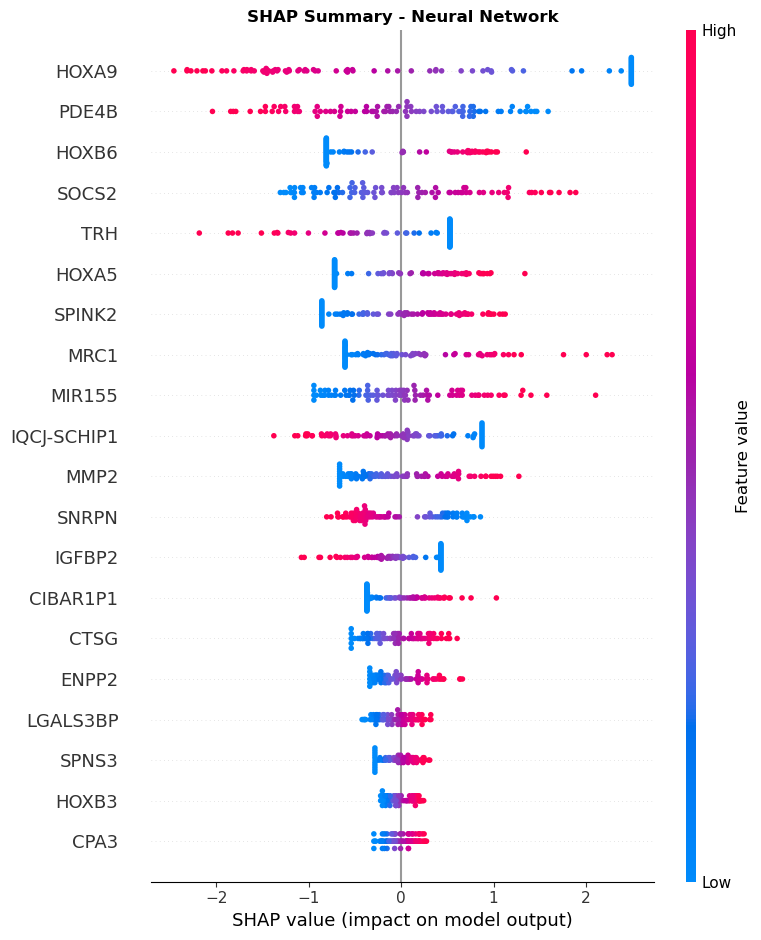

In [307]:
import shap
import matplotlib.pyplot as plt

# Create figure before plotting
plt.figure()

# Plot SHAP summary for Neural Network (no slicing!)
shap.summary_plot(shap_values, test_x, max_display=20, show=False)

# Title, layout, save
plt.title("SHAP Summary - Neural Network", fontsize=12, weight='bold')
plt.tight_layout()

# Save the plot
plt.savefig("shap_nn_summary.png", dpi=300, bbox_inches='tight')

# Optionally show it
plt.show()
